In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import dirichlet, multivariate_normal, gennorm

# 2D Normal

In [61]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]

In [62]:
normal_dist = multivariate_normal(mean=np.zeros(2, dtype=np.float32), cov=[[5, 0], [0, 2]])

In [63]:
normal_dist.pdf(normal_dist.rvs()[None,...])

0.04066304613934464

In [64]:
pdf = normal_dist.pdf(grid_points).reshape(100, 100)

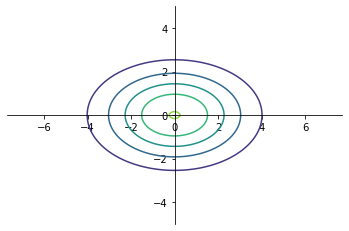

In [65]:
plt.contour(xx, yy, pdf, 5)
plt.axis('equal')
ax = plt.gca()
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Dirichlet

In [172]:
triangle = np.array([
    [0.0, 0.0],
    [0.5, np.sqrt(3)/2],
    [1.0, 0.0]
]).T
print(triangle)

[[0.        0.5       1.       ]
 [0.        0.8660254 0.       ]]


In [124]:
dir_dist = dirichlet(alpha=[2.0, 2.0, 2.0])

In [125]:
dir_dist.pdf(dir_dist.rvs().squeeze())

4.2053390867291816

In [130]:
xx, yy = np.meshgrid(np.linspace(0, 1, 1000), np.linspace(0, 1, 500))

grid_points = np.c_[xx.ravel(), yy.ravel()]

grid_points = np.c_[grid_points, 1 - grid_points.sum(axis=1)]

In [131]:
print(grid_points.shape)
grid_points

(500000, 3)


array([[ 0.      ,  0.      ,  1.      ],
       [ 0.001001,  0.      ,  0.998999],
       [ 0.002002,  0.      ,  0.997998],
       ...,
       [ 0.997998,  1.      , -0.997998],
       [ 0.998999,  1.      , -0.998999],
       [ 1.      ,  1.      , -1.      ]])

In [132]:
dir_probs = np.apply_along_axis(lambda point: dir_dist.pdf(point) if point[2] >= point[0] >= point[1] > 0 else 0.0, -1, grid_points)

(0.0, 0.5)

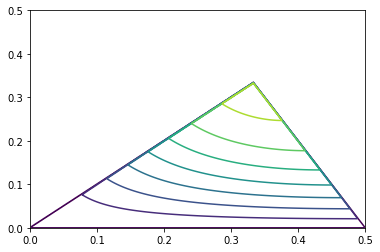

In [139]:
plt.contour(xx, yy, dir_probs.reshape(500, 1000))
plt.gca().set_xlim((0,0.5))
plt.gca().set_ylim((0,0.5))


# Generalized Normal

In [166]:
gen_dist = gennorm(50, loc=[0, 0])

In [167]:
xx, yy = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]

In [173]:
xx.shape, yy.shape

((200, 200), (200, 200))

In [168]:
likelihoods = gen_dist.pdf(grid_points).prod(axis=1)

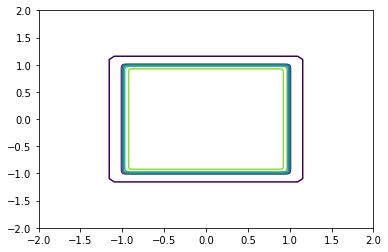

In [171]:
plt.contour(xx, yy, likelihoods.reshape(200, 200), 5)